In [1]:
import numpy as np
import pandas as pd
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("CCPP\Folds5x2_pp - Sheet1.csv") 
# df1=pd.read_csv("CCPP\Folds5x2_pp - Sheet2.csv") 
# df2=pd.read_csv("CCPP\Folds5x2_pp - Sheet3.csv") 
# df3=pd.read_csv("CCPP\Folds5x2_pp - Sheet4.csv") 
# df4=pd.read_csv("CCPP\Folds5x2_pp - Sheet5.csv") 

# df=df.append(df1,ignore_index=True)
# df=df.append(df2,ignore_index=True)
# df=df.append(df3,ignore_index=True)
# df=df.append(df4,ignore_index=True)

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
def normalise(df,func):
    maxes=[]
    mins=[]
    for c in df.columns:
        maxes.append(df[c].max())
        mins.append(df[c].min())
    count=0
    for c in df.columns:
        if(func=="tanh"):
            df[c]=(2*df[c]-(maxes[count]+mins[count]))/(maxes[count]-mins[count])
        elif(func=="sigmoid"):
            df[c]=(df[c]-(mins[count]))/(maxes[count]-mins[count])

        count=count+1
    print(mins)
    print(maxes)
    return maxes,mins
#     print(df)

def denormalise(y,func,maxes,mins):
    if(func=="tanh"):
        ynew=(y*(maxes-mins)+(maxes+mins))/2
    elif(func=="sigmoid"):
        ynew=y*(maxes-mins)+mins
    return ynew
    

In [5]:
activation='tanh'

og_y=df['PE']
maxes,mins=normalise(df,activation)
y=np.array(df['PE'].values)
df.drop(['PE'], axis=1,inplace=True)

x=np.array(df.values)

[1.81, 25.36, 992.89, 25.56, 420.26]
[37.11, 81.56, 1033.3, 100.16, 495.76]


In [6]:
df

,AT,V,AP,RH
0,-0.254958,-0.416370,0.543182,0.276408
1,0.324079,0.338078,0.343727,-0.101340
2,-0.813031,-0.500356,-0.046276,0.784987
3,0.079320,0.137367,-0.141302,0.369437
4,-0.489518,-0.567972,-0.191289,0.905094
...,...,...,...,...
9563,-0.159207,-0.134164,0.045286,0.754424
9564,-0.355241,-0.508185,0.523385,0.105094
9565,0.671955,0.742705,-0.008661,-0.707239
9566,0.284419,0.569039,0.037862,-0.012601


In [7]:
pprint(x)
pprint(y)


array([[-0.25495751, -0.41637011,  0.54318238,  0.27640751],
       [ 0.32407932,  0.33807829,  0.3437268 , -0.10134048],
       [-0.81303116, -0.50035587, -0.04627567,  0.7849866 ],
       ...,
       [ 0.67195467,  0.74270463, -0.00866122, -0.70723861],
       [ 0.28441926,  0.56903915,  0.03786192, -0.01260054],
       [ 0.12124646,  0.32241993,  0.20465231,  0.13431635]])
array([ 0.13907285, -0.3613245 ,  0.80927152, ..., -0.75337748,
       -0.58993377, -0.12529801])


In [8]:
X_train1, X_test, y_train1, y_test = train_test_split(x, y, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

print(y_train)

X_train=np.transpose(X_train) 
X_valid=np.transpose(X_valid)
X_test=np.transpose(X_test) 
# y_train=np.transpose(y_train)
# y_valid=np.transpose(y_valid) 
# y_test=np.transpose(y_test) 

print(y_train.shape)

# X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
y_train=y_train.reshape(1,y_train.shape[0])
# X_valid=X_valid.reshape(X_valid.shape[1],X_valid.shape[0])
y_valid=y_valid.reshape(1,y_valid.shape[0])
# X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])
# print(X_train.shape[1])
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(6888, 4) (6888,)
(1723, 4) (1723,)
(957, 4) (957,)
[ 0.15099338  0.45033113 -0.38198675 ... -0.67761589 -0.4015894
  0.05165563]
(6888,)
(4, 6888) (1, 6888)
(4, 1723) (1, 1723)
(4, 957) (1, 957)


In [9]:
X_train

array([[-0.32181303, -0.52521246, -0.06798867, ...,  0.57053824,
         0.07422096, -0.24872521],
       [-0.36441281, -0.58078292,  0.58647687, ...,  0.62206406,
         0.12064057, -0.35516014],
       [-0.08834447, -0.01756991, -0.44518683, ..., -0.29076961,
        -0.03439743,  0.10517199],
       [ 0.18337802,  0.2847185 ,  0.92573727, ...,  0.20965147,
         0.55683646, -0.13726542]])

In [10]:
print(y_valid)
print(y_train)
print(y_test)

[[-0.56556291 -0.46013245  0.17059603 ... -0.00794702 -0.62490066
   0.30198675]]
[[ 0.15099338  0.45033113 -0.38198675 ... -0.67761589 -0.4015894
   0.05165563]]
[[-0.44397351 -0.15152318 -0.45324503  0.47390728  0.33509934 -0.48980132
  -0.66172185 -0.46966887 -0.37456954 -0.56        0.47708609 -0.48609272
   0.77933775 -0.40874172  0.10251656  0.60450331 -0.2807947   0.1205298
  -0.36980132  0.73350993  0.43470199 -0.28503311 -0.0386755  -0.57536424
  -0.37430464 -0.34331126  0.14728477 -0.73086093  0.47417219 -0.70807947
   0.19470199 -0.03629139  0.42410596 -0.73218543 -0.08741722 -0.71735099
   0.14543046  0.33430464  0.97748344  0.72450331 -0.49986755 -0.22278146
  -0.15205298 -0.4786755   0.49456954 -0.69748344  0.14807947 -0.02225166
  -0.41854305 -0.35099338 -0.21695364 -0.41986755 -0.56953642  0.22649007
   0.15602649  0.7592053  -0.81033113 -0.70569536  0.69377483 -0.05430464
   0.20423841 -0.23311258  0.8415894   0.74278146 -0.71178808  0.64688742
   0.28715232 -0.1626490

In [11]:
# layers_dims = [4,30,15,5,1]
# # layers_dims = [4,1,30,10,1]
# parameters = L_layer_model(X_train, y_train, layers_dims, num_iterations = 5000,learning_rate = 0.01, print_cost = True,
#                            lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,regularisation='L2',  epsilon = 1e-8,activation='tanh')

Cost after epoch 0: 0.010007  0.008956
Cost after epoch 1: 0.007839  0.006408
Cost after epoch 2: 0.007527  0.006845
Cost after epoch 3: 0.007558  0.007233
Cost after epoch 4: 0.007489  0.008116
Cost after epoch 5: 0.007485  0.006092
Cost after epoch 6: 0.007397  0.006998
Cost after epoch 7: 0.007437  0.006471
Cost after epoch 8: 0.007397  0.007286
Cost after epoch 9: 0.007522  0.007270
Cost after epoch 10: 0.007416  0.007156
Cost after epoch 11: 0.007417  0.006681
Cost after epoch 12: 0.007469  0.007532
Cost after epoch 13: 0.007500  0.006616
Cost after epoch 14: 0.007416  0.006573
Cost after epoch 15: 0.007426  0.006465
Cost after epoch 16: 0.007494  0.006399
Cost after epoch 17: 0.007430  0.008432
Cost after epoch 18: 0.007469  0.006094
Cost after epoch 19: 0.007400  0.006788
Cost after epoch 20: 0.007525  0.006651
Cost after epoch 21: 0.007341  0.006414
Cost after epoch 22: 0.007503  0.006376
Cost after epoch 23: 0.007494  0.006577
Cost after epoch 24: 0.007556  0.007471
Cost after

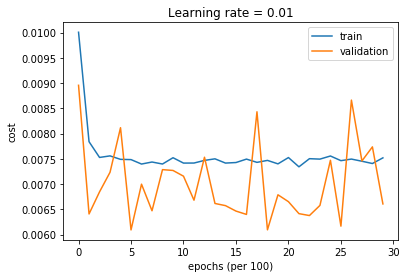

In [53]:
layers_dims = [4,10,10,1]
# layers_dims = [4,80,60,40,1]
# layers_dims = [4,1,30,20,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 30,
                he_init=False, mini_batch_size = 1,learning_rate = 0.01, print_cost = True,regularisation='none',lambd=0.1,
                    optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


# parameters = L_layer_model_minib(train_x, train_y, layers_dims, valid=False, num_iterations = 50,learning_rate = 0.001, 
#                             print_cost = True,lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,
#                             activation='tanh',regularisation='none',mini_batch_size=1,cost_func="mse",he_init=True)

In [51]:
pred_train = predictvals(X_train, parameters,activation=activation)
pred_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
pred_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
pred_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)

0.9202266596903051
0.943036375526693
0.9093181467952177


In [25]:
print(pred_denorm)

[[452.13921383 459.48514942 455.5516892  476.14055271 492.83464062
  457.94210547 454.17847396 464.32203469 456.04015861 450.55337998
  478.04720032 457.13084903 487.13160653 464.62681753 478.10926365
  478.50797081 454.76009448 494.60707139 469.74583544 484.91661859
  495.49031181 454.87864991 491.64533339 460.26048181 466.12732005
  459.58642198 495.39490569 449.6846342  495.5150208  453.93087836
  474.62581621 478.30840071 492.29665072 452.72239838 493.31641487
  457.03867539 495.17902932 492.62607018 493.81297023 479.42511319
  454.97442651 482.73179901 463.27659053 453.16713386 482.20348165
  460.05978868 471.85841696 493.03465343 457.85627008 490.43299237
  463.99160355 456.28044556 451.8938819  478.99277316 495.51966717
  479.64677139 471.22189578 454.14775462 472.86265884 486.03592788
  479.97827774 468.16196981 490.65091014 484.10935923 457.15267969
  476.55272586 479.78450827 455.4747355  463.3220418  490.70239887
  491.22522722 458.15140584 479.754476   465.3556894  474.8881

In [26]:
# reg="none"
# act=activation

# mape=predicterr(X_train,y_train,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

# mape=predicterr(X_valid,y_valid,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

# mape=predicterr(X_test,y_test,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

In [27]:
pred_train = predictvals(X_train, parameters,activation=activation)


In [17]:
for i in range(0,10):
    print(pred_train[0][i])
print("y vals")
for i in range(0,10):
    print(y_train[0][i])
print(pred_train.shape)
print(X_train.shape)

0.2653154963811685
0.6347158995282164
-0.5478388265764575
0.37711068095726435
-0.5797410458734965
-0.0017796856040604835
0.7228250716609991
-0.34701378243587705
-0.6050770028591146
0.49101324595871554
y vals
0.1509933774834434
0.4503311258278146
-0.38198675496688783
0.06172185430463534
-0.4357615894039732
-0.09536423841059512
0.8235761589403982
-0.3295364238410595
-0.5316556291390727
0.3070198675496697
(1, 6888)
(4, 6888)


In [18]:
pred_test = predictvals(X_test, parameters,activation=activation)
for i in range(0,10):
    print(pred_test[0][i])
print("y vals")
for i in range(0,10):
    print(y_test[0][i])
print(pred_test.shape)
print(X_test.shape)

-0.5752978624110768
-0.4573817798467052
-0.37456310308621854
0.3131361889953816
0.3604780390875326
-0.57672156900511
-0.6656931610200629
-0.4263869617953743
-0.3175625346209097
-0.6470734390608716
y vals
-0.4439735099337746
-0.15152317880794625
-0.45324503311258313
0.47390728476821153
0.33509933774834527
-0.4898013245033115
-0.6617218543046363
-0.4696688741721859
-0.3745695364238407
-0.5599999999999996
(1, 957)
(4, 957)


In [19]:
# valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation='sigmoid',regularisation='L2',cost_func='log')
valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation=activation,regularisation='L2',cost_func="mse")

In [20]:
print(valid_err)

0.009208682622994348


In [21]:
# pred_test= predictvals(X_test, parameters,activation=activation)
# plt.scatter(X_test[0],pred_test,color='green')
# plt.show()
# plt.scatter(X_test[1],pred_test,color='red')
# plt.show()

# plt.scatter(X_test[2],pred_test,color='orange')
# plt.show()

# plt.scatter(X_test[3],pred_test)

In [22]:
# # pred_test= predictvals(X_test, parameters,activation='sigmoid')
# plt.scatter(y_test,X_test[0],color='green')
# plt.show()
# plt.scatter(X_test[1],y_test,color='red')
# plt.show()

# plt.scatter(X_test[2],y_test,color='orange')
# plt.show()

# plt.scatter(X_test[3],y_test)